<!-- # <h1 align = "center"> Révision </h1>

<h4 align = "center"> Dans ce fichier, nous allons effectuer une analyse complète des données.</h2> -->

#  Identification du problème

La première étape de toute analyse consiste à identifier le problème que nous allons étudier. Dans ce fichier, notre problème est de déterminer quels sont les facteurs qui influencent la satisfaction des individus. Pour aborder ce problème, nous formulons plusieurs hypothèses. Par exemple, nous pourrions supposer que le revenu, l'éducation, l'expérience professionnelle et le secteur d'activité ont une influence sur la satisfaction. Pour répondre à ces questions, nous allons effectuer les analyses suivantes :

- Régression linéaire simple : nous allons essayer de prédire la satisfaction en nous basant sur une variable qui présente une relation linéaire avec la satisfaction.
- Régression linéaire multiple : nous allons essayer de prédire la satisfaction en nous basant sur plusieurs variables qui présentent une relation linéaire avec la satisfaction.
- ANOVA (Analyse de la variance) : nous allons utiliser l'ANOVA pour déterminer si les moyennes de satisfaction diffèrent significativement entre différents groupes ou catégories de variables.
- ACP (Analyse en composantes principales) : nous allons utiliser l'ACP pour réduire la dimensionnalité de nos données et identifier les variables qui contribuent le plus à la variation de la satisfaction.
- AFC (Analyse factorielle des correspondances) : nous allons utiliser l'AFC pour étudier la correspondance entre deux variables qualitatives.

# Collection des données

La deuxième étape est généralement la phase de collection des données. Pour cela, nous devons suivre plusieurs étapes :

1. Identification de l'échantillon : Il est essentiel de choisir un échantillon représentatif qui correspond à notre problème d'étude. Cela garantit que les résultats obtenus sont généralisables à la population cible.

2. Collecte des données : La collecte des données peut être réalisée à l'aide de questionnaires, d'entretiens, d'observations, etc. Il est important de collecter un maximum de données pertinentes pour notre analyse.

Dans notre cas, nous utiliserons des données générées par l'IA, juste pour la simplicité.

# Prétraitement des données

La troisième étape consiste au prétraitement des données. Cela implique la suppression des variables perturbantes, le filtrage et la suppression des colonnes indésirables, ainsi que la transformation des données en un format avec lequel nous pouvons travailler.

Pour effectuer le prétraitement des données, nous pouvons utiliser des techniques telles que :

- Nettoyage des données : Suppression des valeurs manquantes, des valeurs aberrantes et des doublons.
- Transformation des données : Normalisation, discrétisation, codage des variables catégorielles, etc.
- Sélection des variables : Identification des variables les plus pertinentes pour notre analyse.

Une fois que nous avons prétraité nos données, nous sommes prêts à passer à l'étape suivante de notre analyse.

Maintenant, on commence notre analyse, d'abord on faire la lecture des données.

- ## Lecture des données

Ici on va lire les données de population :

In [574]:
population <- read.csv("data/data.csv", stringsAsFactors = TRUE)
head(population[c(0:length(population))])

,Revenu,Experience,Education,Satisfaction,Secteur,Age
,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
1,48000,5,Secondaire,8.5,Ouvrier agricole,32
2,60000,8,Bachelor,7.2,Secrétaire,45
3,35000,3,Secondaire,6.0,Ouvrier agricole,28
4,90000,9,Ph.D.,9.3,PDG,38
5,110000,11,Master,8.8,Ingénieur agronome,50
6,75000,6,Master,7.5,Employé administratif,34


Pour notre etude, on va juste se limiter à un echantillon de 30 individus.

In [581]:
# on prend juste un echantillon de 30 individus
set.seed(1)  # pour que les resultats soient reproductibles
data <- population[sample(1:nrow(population), 30), ]
data[c(0:length(data))]

,Revenu,Experience,Education,Satisfaction,Secteur,Age
,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
68,121000,9,Master,8.9,Ingénieur agronome,47
129,103000,9,Master,8.3,PDG,44
43,77000,7,Bachelor,8.0,Secrétaire,36
14,80000,8,Master,8.0,PDG,32
51,83000,7,Bachelor,7.9,Secrétaire,42
85,103000,7,Ph.D.,8.4,PDG,40
21,70000,5,Secondaire,6.3,Ouvrier agricole,31
106,48000,6,Secondaire,6.2,Ouvrier agricole,25
74,66000,6,Secondaire,6.1,Ouvrier agricole,24


La description des données :
1. **Revenu :** Le revenu en dollars.
2. **Expérience :** Le nombre d'années d'expérience dans le domaine de travail.
3. **Éducation :** Le niveau d'éducation, catégorisé en Secondaire, Bachelor (Licence), Master et Ph.D.
4. **Satisfaction :** Le niveau de satisfaction, mesuré sur une échelle donnée.
5. **Secteur d'activité :** Le secteur d'activité dans lequel la personne travaille.
6. **Âge :** L'âge de la personne.

Dans notre cas, nous avons aucune valeur nulle.

# Analyse Statistique

Maintenant on commence notre Analyse Statistique, et la première chose est de déterminer les types des variables a étudier.

## Types des variables

### **Variables quantitatives :**

  1. Revenu - Quantitative continue (mesurée en dollars).
  2. Expérience - Quantitative discrète (mesurée en années).
  3. Satisfaction - Quantitative continue (mesurée sur une échelle).
  4. Âge - Quantitative discrète (groupe d'âge).

### **Variables qualitatives :**

  1.  Éducation - Qualitative ordinale (niveau d'éducation catégorisé en Secondaire, Bachelor, Master, Ph.D.).
  2. Secteur - Qualitative nominale (catégorie du secteur d'activité).

## Analyse univariée

L'analyse univariée est une étape initiale dans l'exploration des données qui vise à comprendre la distribution et les caractéristiques d'une seule variable à la fois. Elle permet d'obtenir des informations statistiques et des tendances centrales pour une variable donnée, qu'elle soit quantitative ou qualitative.

**Pour les variables quantitatives :**
- **Description générale :** La description d'une variable quantitative implique l'analyse de la tendance centrale, qui est souvent représentée par la moyenne, la médiane et le mode. On examine également la dispersion des données, généralement mesurée par l'écart type.
- **Visualisation :** Pour visualiser une variable quantitative, on utilise généralement des histogrammes, des boîtes à moustaches (box plots) et des diagrammes de densité.

**Pour les variables qualitatives :**
- **Description générale :** Pour les variables qualitatives, l'analyse se concentre sur la fréquence de chaque catégorie. On examine également les proportions et les pourcentages pour avoir une idée de la répartition des catégories.
- **Visualisation :** Les diagrammes en barres (bar plots) et les diagrammes circulaires (pie charts) sont couramment utilisés pour visualiser les variables qualitatives.

Ces analyses univariées fournissent une compréhension approfondie des caractéristiques individuelles des variables, ce qui peut orienter la sélection des méthodes d'analyse statistique plus avancées par la suite.

### Étude d'une variable qualitative (Éducation):

  #### Le tableau de l'effectif :

In [582]:
# Créer un dataframe pour l'analyse univariée
library(tidyverse)
univariate_table <- data %>%
  group_by(Education) %>%
  summarise(
    Effectif = n(),                  # Effectif
    Frequence = n() / nrow(data)     # Fréquence
  )
univariate_table$FCC <- cumsum(univariate_table$Frequence) # Fréquence cumulée croissante
univariate_table$FCD <- rev(cumsum(rev(univariate_table$Frequence))) # Fréquence cumulée décroissante

# Afficher le tableau
as.data.frame(univariate_table)


Education,Effectif,Frequence,FCC,FCD
<fct>,<int>,<dbl>,<dbl>,<dbl>
Bachelor,5,0.1666667,0.1666667,1.0000000
Master,8,0.2666667,0.4333333,0.8333333
Ph.D.,8,0.2666667,0.7000000,0.5666667
Secondaire,9,0.3000000,1.0000000,0.3000000


 #### Représentation graphique :  

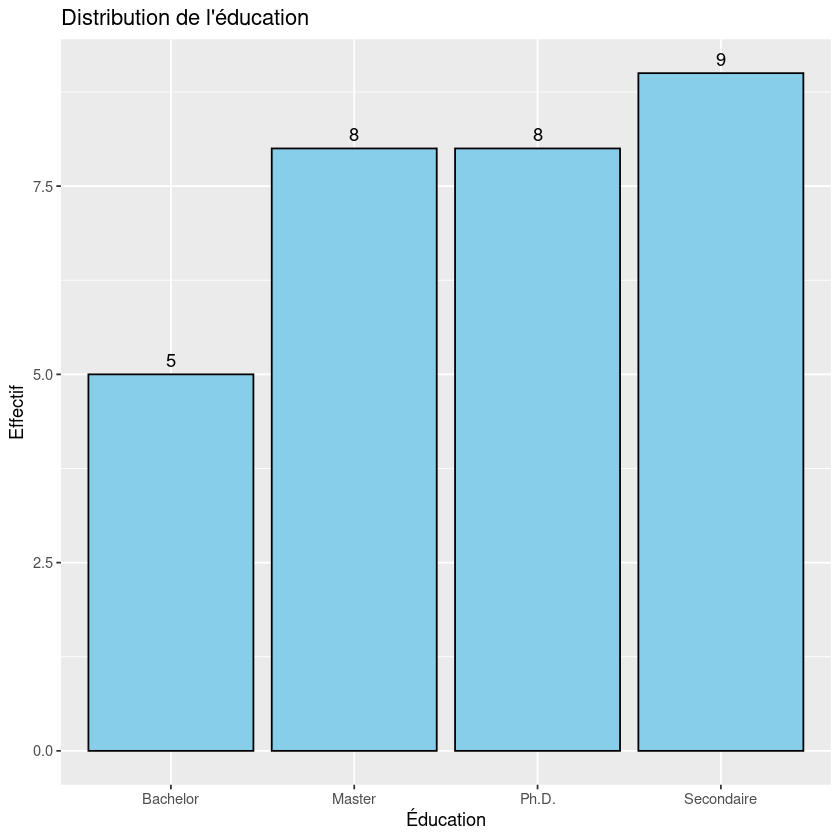

In [583]:
library(ggplot2)

# Créer un bar plot pour la variable 'Education'
ggplot(data, aes(x = Education)) +
  geom_bar(fill = "skyblue", color = "black") +
  geom_text(stat = "count", aes(label = after_stat(count)), vjust = -0.5) +
  labs(title = "Distribution de l'éducation",
       x = "Éducation",
       y = "Effectif")


### Étude d'une variable quantitative (Satisfaction)  

 ####  Tendance centrale :

In [584]:
moyenne <- mean(data$Satisfaction)
freq_table <- table(data$Satisfaction)
modes <- as.numeric(names(freq_table[freq_table == max(freq_table)]))
median <- median(data$Satisfaction)
min <- min(data$Satisfaction)
max <- max(data$Satisfaction)

# Affichage des résultats avec print
df <- data.frame(
  Minimum = min,
  Moyenne = moyenne,
  Modes = toString(modes),
  Médiane = median,
  Maximum = max
)
df


Minimum,Moyenne,Modes,Médiane,Maximum
<dbl>,<dbl>,<chr>,<dbl>,<dbl>
5.6,7.643333,8,8.05,9.2


Ici on peut voir l’intervalle de variation de la variable Satisfaction, aussi on peut voir que la médiane de 8 est proche de la moyenne, suggérant une distribution relativement symétrique. On vérifie ca avec les paramètres de la dispersion.

#### Dispersion :

In [585]:
var <- var(data$Satisfaction)
et <- sd(data$Satisfaction)
df <- data.frame(
  Variance = var,
  Écart_type = et
)
df

Variance,Écart_type
<dbl>,<dbl>
1.430126,1.195879


Les paramètres de la dispersion nous donne des informations sur la distribution des individus et leur dispersion autour de la moyenne, ici on voit que l’écart-type ($\sigma$) n'est pas assez petit que la moyenne ($\bar{X}$), cela peut signifie que nos données ne sont pas très homogènes, et on vérifie ca avec la représentation graphique.

#### Représentation graphique :  
  - Histogramme

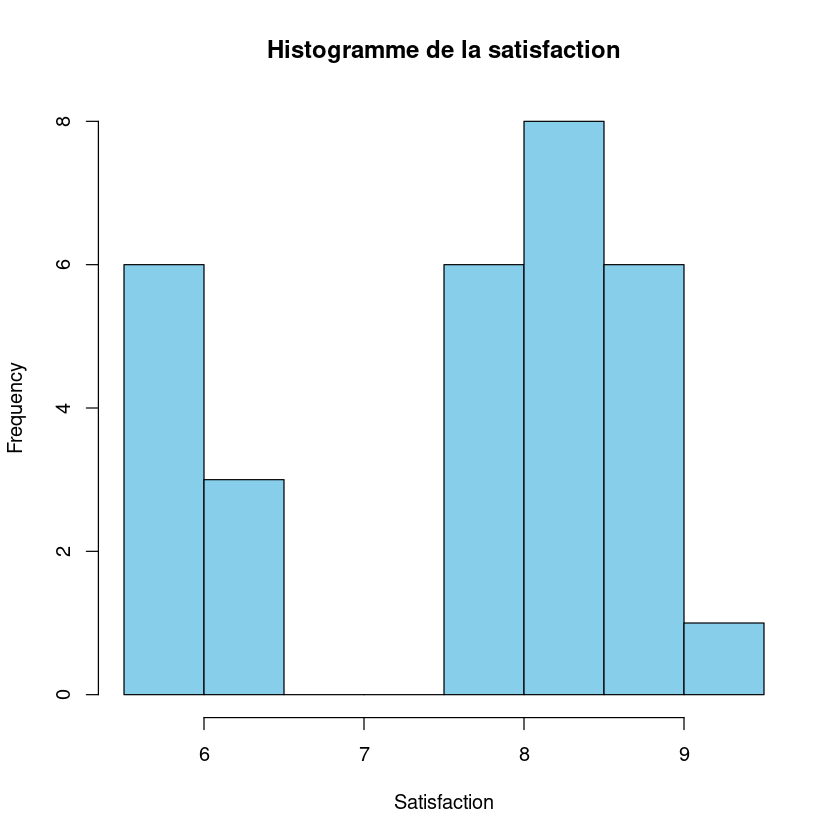

In [586]:
hist(data$Satisfaction,
  breaks = 10, col = "skyblue", border = "black", xlab = "Satisfaction", main = "Histogramme de la satisfaction"
)


Ici on peut clairement voir que la distribution est asymétrique vers le gauche, avec des scores entre 6 et 7 ayant des fréquences plus faibles, et des scores plus que ayant également une fréquence plus faible que 8, mais plus élevée que les valeurs entre 6 et 7.

Une interprétation serait que les participants sont généralement satisfaits, avec une légère majorité étant très satisfaite (score de environs 8),un nombre important des gens qui sont modérément satisfaits (scores entre 6 et 7), tandis que moins sont extrêmement satisfaits (score autour de 9).

- Boite a moustache

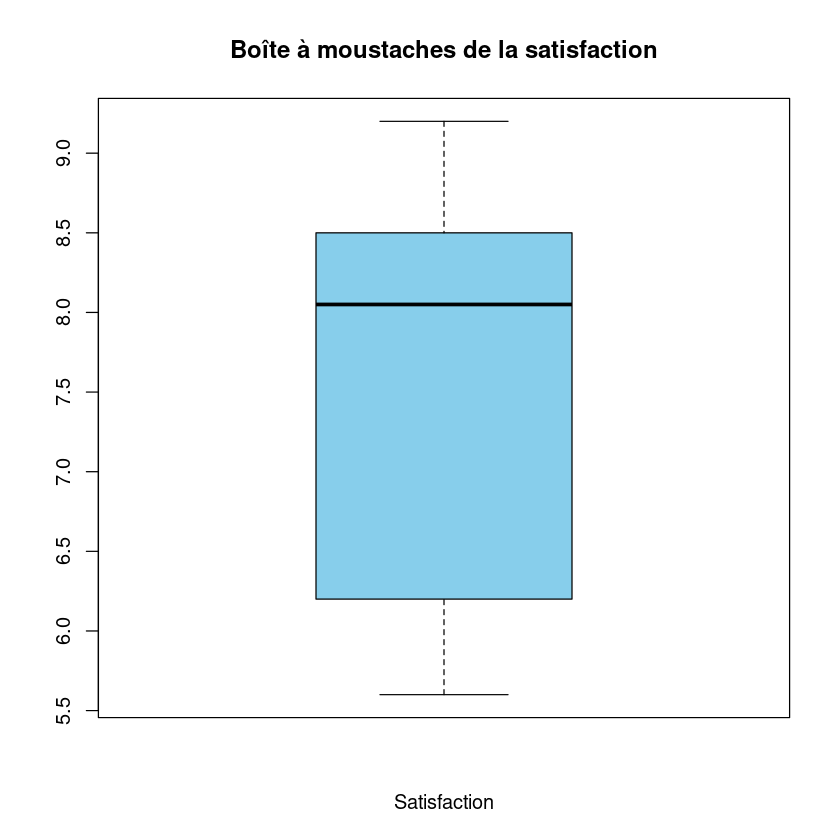

In [587]:
boxplot(data$Satisfaction, col = "skyblue", border = "black", xlab = "Satisfaction", main = "Boîte à moustaches de la satisfaction")

Ce boite a moustache affirme l’asymétrie de notre données, avec l'absence des outliers.

Maintenant qu'on a terminer avec l'analyse univariée, on passe a l'analyse bivairée.

## Analyse bivariée

L'analyse bivariée constitue la prochaine étape logique après l'analyse univariée et se concentre sur les relations entre deux variables à la fois. Elle permet d'explorer les associations, les corrélations et les dépendances entre différentes paires de variables, qu'elles soient quantitatives ou qualitatives.

**Pour les variables quantitatives :**

1. **Régression linéaire simple :** Lorsque l'on souhaite comprendre la relation linéaire entre deux variables quantitatives, la régression linéaire simple est souvent utilisée. Elle permet de modéliser et de prédire la variable dépendante en fonction de la variable indépendante.

2. **Corrélation :** La corrélation (par exemple, le coefficient de corrélation de Pearson) mesure la force et la direction de la relation linéaire entre deux variables quantitatives. Elle indique si les variations dans une variable sont associées aux variations dans une autre variable.

**Pour les variables qualitatives :**

1. **Tableau de contingence :** Lorsque l'on travaille avec deux variables qualitatives, un tableau de contingence est souvent utilisé pour résumer la fréquence des occurrences conjointes des différentes catégories.

2. **Test du chi-carré :** Le test du chi-carré permet de déterminer si deux variables qualitatives sont indépendantes ou s'il existe une association significative entre elles.

3. **Analyse des Correspondances (ACF) :** L'ACF est une méthode puissante pour explorer les relations entre deux variables qualitatives. Elle permet de visualiser et d'interpréter les relations entre les catégories de plusieurs variables qualitatives. L'ACF peut remplacer le tableau de contingence et le test du chi-carré, car ils font partie intégrante de l'ACF.

**Pour les variables mixtes (une quantitative et une qualitative) :**

1. **Analyse de variance (ANOVA) :** Lorsque l'on souhaite comparer les moyennes de la variable quantitative entre différentes catégories de la variable qualitative, l'ANOVA peut être utilisée.

Ces méthodes d'analyse bivariée permettent de découvrir et d'interpréter les relations entre différentes paires de variables, contribuant ainsi à une compréhension plus approfondie des données.

### Étude de deux variables quantitative :

On désormais étudier al relation entre la satisfaction et le revenue des individue, pour cela, on va faire une régression linéaire. Mais tous d'abord, on va voir est ce qu'il y a vraiment une corrélation entre notre variable dépendante (satisfaction) et la variable indépendante (revenue).

  #### Test de Corrélation :

  Pour le test de corrélation de Pearson, le test d’hypothèse est : 
    $$
      \begin{cases} 
        H_0 = \rho = 0 \\
        H_1 = \rho \neq 0 \\
      \end{cases}  
    $$

  Dans ce contexte, $\rho$ représente le coefficient de corrélation, l’hypothèse nulle consiste qu'il n y a pas de corrélation, l'hypothèse alternative dit qu'il ya une corrélation, on rejette l'hypothèse nulle si le $p_{value}$ de test est inférieur a notre seuil $\alpha$, on fix $\alpha$ sur $0.05$. 

In [588]:
# data$Revenu
cor.test(data$Satisfaction, data$Revenu)


	Pearson's product-moment correlation

data:  data$Satisfaction and data$Revenu
t = 7.4838, df = 28, p-value = 3.761e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6463912 0.9092997
sample estimates:
      cor 
0.8165147 


Ici on voit que le $p_{value} < 0.05$, donc on rejette l’hypothèse nulle, alors il ya une corrélation entre notre variables, ainsi que on peut voir que le coefficient de corrélation $\rho = 0.81$.
Un coefficient proche de 1 indique qu'il ya une forte corrélation positive.

- Présence de linéarité
  
On peut assurer cette relation linéaire par un graphe.

  

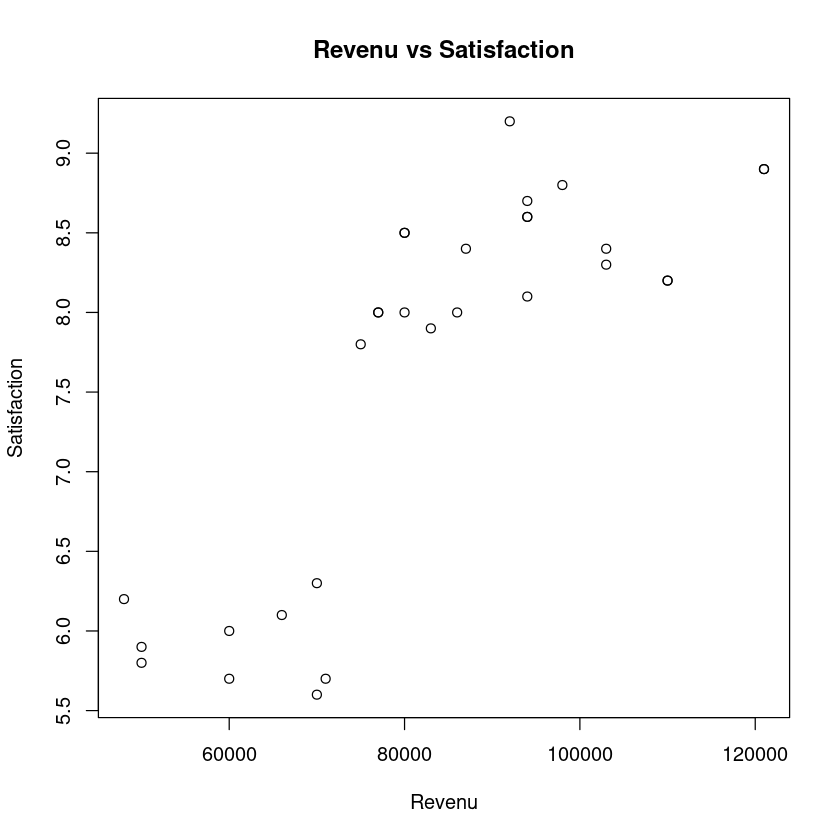

In [589]:
plot(data$Revenu, data$Satisfaction, xlab = "Revenu", ylab = "Satisfaction", main = "Revenu vs Satisfaction")

Ici on peut voir clairement qu'il ya une sorte de linéarité entre les deux variables, et on peut procéder a la régression linéaire.


#### Test de normalité des variables

   - **Hypothèses :** 
      $
      \begin{cases} 
        H_0 : \text{Les valeurs suivent une distribution normale} \\
        H_1 : \text{Les valeurs ne suivent pas une distribution normale}
      \end{cases}
      $
   - **Interprétation :** On rejette l'hypothèse nulle si l'histogramme de normalité ou le test de normalité (comme le test de Shapiro-Wilk) indique une non-normalité.


	Shapiro-Wilk normality test

data:  data$Revenu
W = 0.97575, p-value = 0.7047


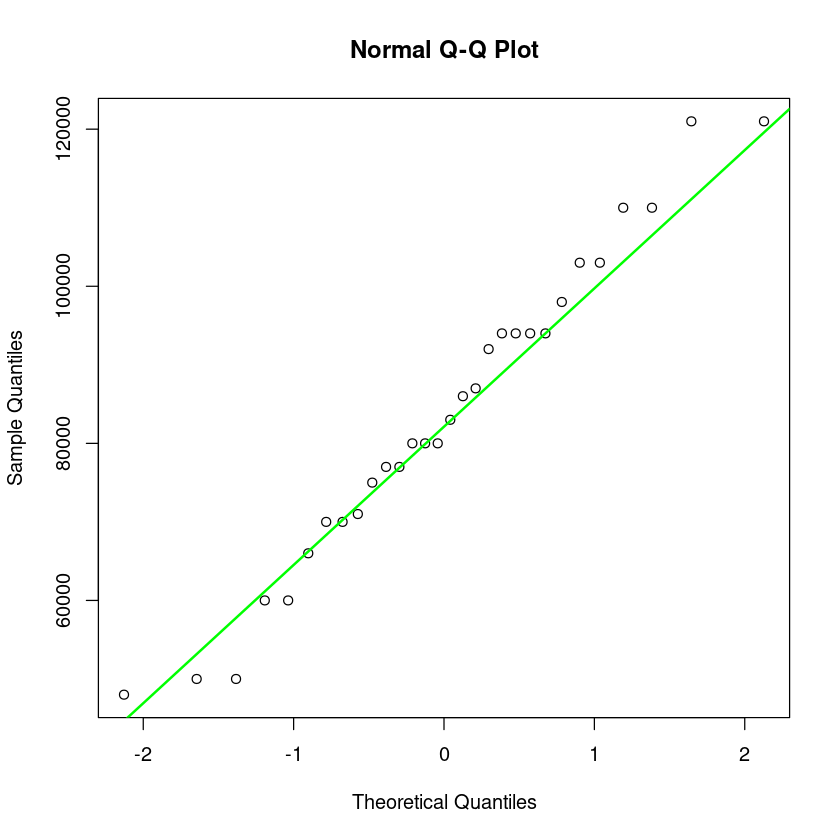

In [590]:
shapiro.test(data$Revenu)
qqnorm(data$Revenu)
qqline(data$Revenu, col = 'green', lwd = 2)

Une valeur p-value $> 0.05$ signifie que la variable Revenu suit la loi normale.


	Shapiro-Wilk normality test

data:  data$Satisfaction
W = 0.82636, p-value = 0.0002061


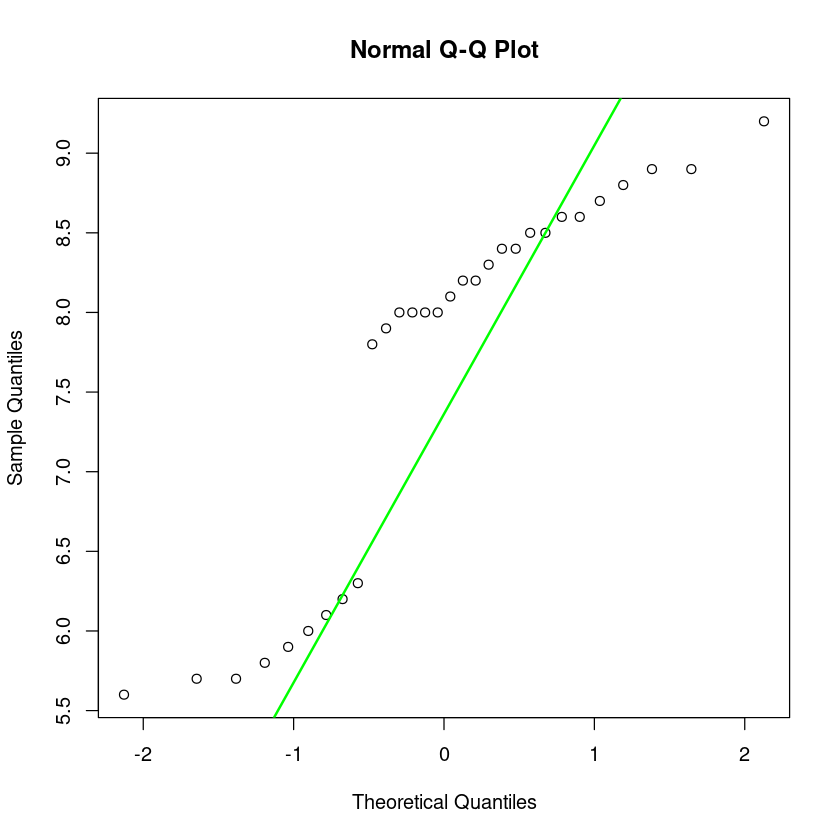

In [591]:
shapiro.test(data$Satisfaction)
qqnorm(data$Satisfaction)
qqline(data$Satisfaction, col = 'green', lwd = 2)

Ici on voit que la variable satisfaction ne suit pas la loi normale.


  #### Régression linéaire



Pour le test de régression linéaire simple, les hypothèses sur les paramètres du modèle sont les suivantes :

$$
\begin{cases}
  \text{Hypothèse sur la Pente (\( \beta_1 \)) :} & \begin{cases}
    H_0: & \beta_1 = 0 \ (\text{Il n'y a pas de relation linéaire significative}) \\
    H_1: & \beta_1 \neq 0 \ (\text{Il y a une relation linéaire significative})
  \end{cases} \\
  \\
  \text{Hypothèse sur l'Intercept (\( \beta_0 \)) :} & \begin{cases}
    H_0: & \beta_0 = 0 \ (\text{L'intercept est nul}) \\
    H_1: & \beta_0 \neq 0 \ (\text{L'intercept est différent de zéro})
  \end{cases}
\end{cases}
$$


Le rejet des hypothèses nulles dépend généralement des p-values associées à chaque coefficient dans la sortie du modèle. Si la p-value associée à $\beta_1$ est inférieure au niveau de signification ($\alpha$) choisi (généralement $0.05$), on peut rejeter l'hypothèse nulle et conclure qu'il y a une relation linéaire significative entre la variable indépendante et la variable dépendante. De manière similaire, si la p-value associée à $\beta_0$ est inférieure à ($\alpha$), on peut rejeter l'hypothèse nulle et conclure que l'intercept est significativement différent de zéro.

La p-value globale du modèle (F-statistic) mesure la significativité globale de l'ensemble du modèle. Une p-value faible (inférieure à $\alpha$) suggère que le modèle dans son ensemble est significatif.

Le coefficient de détermination ($R^2$) mesure la proportion de la variance totale de la variable dépendante qui est expliquée par le modèle. Un $R^2$ élevé (proche de $1$) indique que le modèle explique une grande partie de la variance de la variable dépendante.


In [592]:
modele <- lm(Satisfaction ~ Revenu, data = data)
summary(modele)


Call:
lm(formula = Satisfaction ~ Revenu, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37864 -0.59592  0.08419  0.53451  1.13547 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.524e+00  5.652e-01   6.234 9.78e-07 ***
Revenu      4.936e-05  6.595e-06   7.484 3.76e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7026 on 28 degrees of freedom
Multiple R-squared:  0.6667,	Adjusted R-squared:  0.6548 
F-statistic: 56.01 on 1 and 28 DF,  p-value: 3.761e-08


Interprétation des résultats :

**Coefficients :**

*Constante (Intercept) :* L'estimation de l'intercept est de $3.524$ avec une erreur standard de $0.5652$. Le t-value associé est de $6.234$ avec un p-value très faible de $9.78 \times 10^{-7}$, indiquant que l'intercept est significativement différent de zéro. En d'autres termes, la constante dans le modèle est statistiquement significative.

*Revenu :* L'estimation du coefficient pour la variable "Revenu" est de $4.936 \times 10^{-5}$ avec une erreur standard de $6.595 \times 10^{-6}$. Le t-value associé est de $7.484$ avec un p-value très faible ($< 3.76 \times 10^{-8}$). Cela suggère que la variable "Revenu" a un effet significatif sur la variable "Satisfaction".

**Résidus :**

Les résidus (erreurs) du modèle sont présentés sous la section "Residuals". Ils représentent la différence entre les valeurs observées de la variable dépendante ("Satisfaction" dans ce cas) et les valeurs prédites par le modèle.

**Statistiques du modèle :**

La racine carrée de l'erreur quadratique moyenne $(Residual\ standard\ error)$ est de $0.7026$, donnant une indication de la dispersion des résidus autour de la ligne de régression.

Le coefficient de détermination ($R^2$) est de $0.6667$, signifiant que $66.67\%$ de la variabilité de la variable "Satisfaction" est expliquée par la variable "Revenu".

La statistique F ($F-statistic$) teste si au moins une des variables indépendantes a un effet significatif sur la variable dépendante. Ici, la valeur élevée de $56.01$ avec un p-value très faible ($< 3.761 \times 10^{-8}$) suggère que le modèle global est statistiquement significatif.

En résumé, le modèle de régression linéaire simple suggère que la variable "Revenu" a un effet significatif sur la variable "Satisfaction", et le modèle dans son ensemble est statistiquement significatif. Le $R^2$ indique que le modèle explique une proportion importante de la variabilité de la variable "Satisfaction".

On voit le modèle :

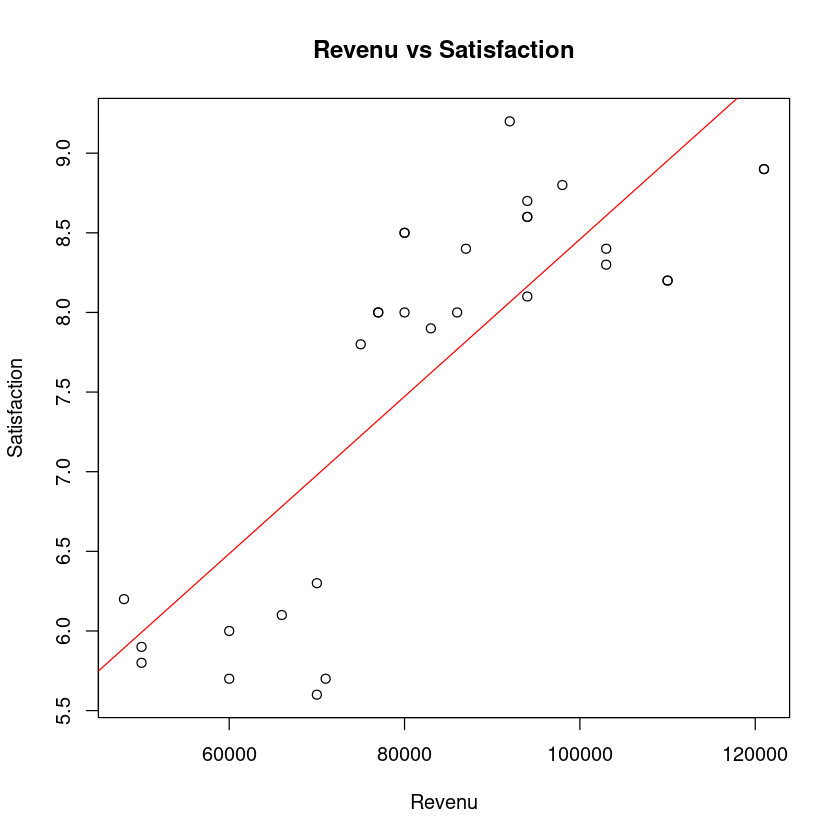

In [593]:
plot(data$Revenu, data$Satisfaction, xlab = "Revenu", ylab = "Satisfaction", main = "Revenu vs Satisfaction")
abline(modele, col = "red")

Ici on voit que la ligne de régression est effectivement passe par la majorité des points.

Pour confirmer que le modèle est significatif, on doit faire des autres tests sur les résidus de notre modèle.

Les tests qu'on doit aborder sont : 

1. **Homoscédasticité :** 

2. **Normalité des résidus :**

3. **Indépendance des résidus :**

Ces tests sont importants pour évaluer la validité des hypothèses sous-jacentes à la régression linéaire et assurer la fiabilité des résultats, pour avoir un modèle qui est bien, tous ou le plus part des tests doivent accepter l'hypothèse nulle.

1. Test d'homoscédasticité (Breusch-Pagan) :

   - **Hypothèses :** 
      $
      \begin{cases} 
        H_0 : \text{La variance des résidus est constante} \\
        H_1 : \text{La variance des résidus n'est pas constante}
      \end{cases}
      $
   - **Interprétation :** On rejette l'hypothèse nulle si le graphique des résidus montre une tendance ou une forme d'entonnoir.

In [594]:
library(lmtest)
bptest(modele)


	studentized Breusch-Pagan test

data:  modele
BP = 0.18561, df = 1, p-value = 0.6666


Donc on voit que $p_{value} > 0.05$, cela indique que la variance des résidus est constante.

2. Test de normalité des résidus (Shapiro-Wilk) :

In [595]:
shapiro.test(resid(modele))


	Shapiro-Wilk normality test

data:  resid(modele)
W = 0.95275, p-value = 0.2002


Une $p_{value} > 0.05$ indique qu'on accepte l’hypothèse nulle, et que les résidus suivent une distribution normale.

On confirme ca avec le graphique de normalité.

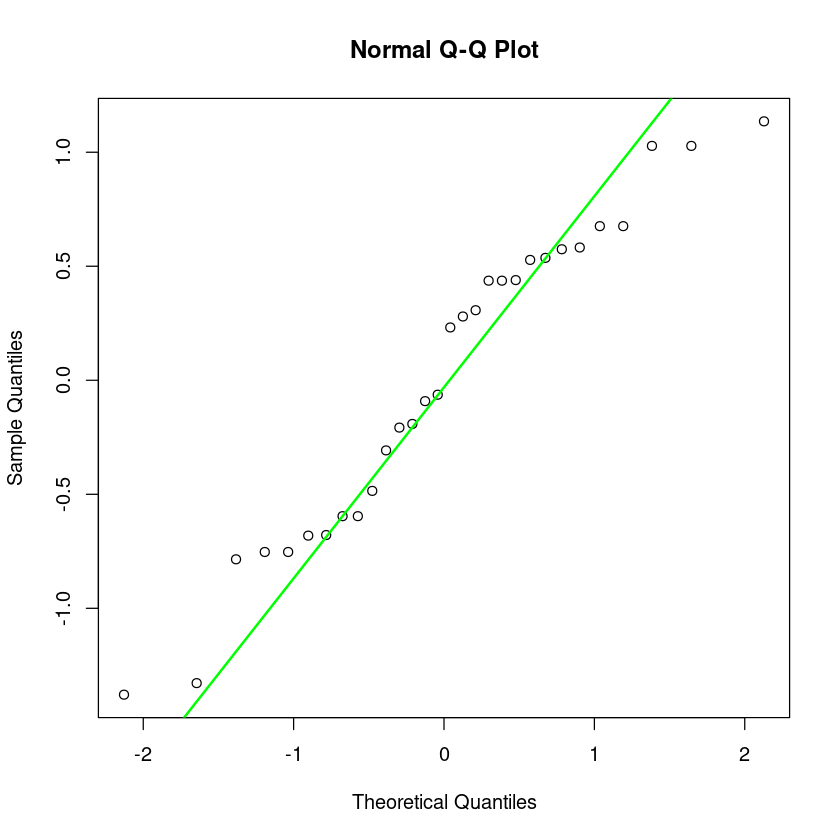

In [596]:
qqnorm(resid(modele))
qqline(resid(modele),col ='green',lwd=2)


3. Test d'indépendance des résidus (Durbin-Watson) :

   - **Hypothèses :** 
      $
      \begin{cases} 
        H_0 : \text{Les résidus sont indépendants} \\
        H_1 : \text{Les résidus ne sont pas indépendants}
      \end{cases}
      $
   - **Interprétation :** On rejette l'hypothèse nulle si les résidus montrent des schémas ou des corrélations évidents.


In [597]:
dwtest(modele)


	Durbin-Watson test

data:  modele
DW = 2.2346, p-value = 0.7277
alternative hypothesis: true autocorrelation is greater than 0


Ici on a $ p_{value} > 0.05$, donc on accepte l’hypothèse nulle, et on dit que les résidus sont indépendants.

#### Conclusion

Le modèle de régression linéaire simple indique une relation significative entre la variable dépendante et la variable indépendante. Cependant, des préoccupations subsistent en raison des violations de l'hypothèses d'homoscédasticité des résidus. Des ajustements ou des analyses plus approfondies sont recommandés pour renforcer la validité du modèle.

### Étude de deux variables qualitatives :

La question que se pose dans cette analyse est, est ce qu'il y a une correspondance entre notre deux variables qualitatives, le niveau d’étude et le poste de travail, pour cela on va effectuer une AFC.

#### Analyse factorielle de correspondance (AFC)

L'Analyse Factorielle des Correspondances (AFC) est une technique d'analyse statistique particulièrement adaptée pour explorer les relations entre deux variables nominales. Elle trouve son application dans des domaines tels que la sociologie, la psychologie, la biologie, et d'autres disciplines où l'on cherche à comprendre les associations entre des catégories de variables.

Voici les principales étapes de l'Analyse Factorielle des Correspondances :

1. **Construction du Tableau de Contingence :** La première étape consiste à créer un tableau de contingence qui résume la fréquence des co-occurrences entre les différentes modalités des deux variables étudiées. Ce tableau met en évidence les associations entre les catégories et constitue la base de l'analyse.

2. **Test du Khi-deux :** Une fois le tableau de contingence établi, on utilise le test du Khi-deux pour évaluer l'indépendance entre les variables. L'hypothèse nulle du test stipule que les variables sont indépendantes, tandis que l'hypothèse alternative suggère une association significative. Un faible résultat de p-value conduirait au rejet de l'hypothèse d'indépendance.

3. **Calcul des Coordonnées Factorielles :** Si le test du Khi-deux indique une dépendance significative, l'analyse se poursuit en calculant les coordonnées factorielles. Ces coordonnées représentent la projection des modalités des variables sur un espace factoriel de dimensions réduites.

4. **Interprétation des Résultats :** L'interprétation des coordonnées factorielles permet de visualiser les associations entre les catégories des variables. Les modalités proches dans l'espace factoriel sont celles qui présentent des similitudes dans leurs distributions conjointes.

L'Analyse Factorielle des Correspondances offre ainsi une approche graphique et statistique pour explorer les relations entre variables catégorielles. Elle permet de mettre en évidence des patterns, des regroupements, ou des dépendances, offrant ainsi un éclairage précieux sur la structure des données.

#### Tableau de contingence

In [598]:
# Construction du tableau de contingence
tc <- table(data$Education, data$Secteur)
colnames(tc) <- c("EmplAdmin", "IngA", "OuvrAg", "PDG", "Secr")
# Affichage du tableau de contingence
tc


            
             EmplAdmin IngA OuvrAg PDG Secr
  Bachelor           1    0      0   0    4
  Master             3    1      0   4    0
  Ph.D.              3    0      0   5    0
  Secondaire         0    0      9   0    0

#### Table de profile ligne :

In [599]:
tpl <- prop.table(tc, 1)
tpl

            
             EmplAdmin  IngA OuvrAg   PDG  Secr
  Bachelor       0.200 0.000  0.000 0.000 0.800
  Master         0.375 0.125  0.000 0.500 0.000
  Ph.D.          0.375 0.000  0.000 0.625 0.000
  Secondaire     0.000 0.000  1.000 0.000 0.000

On lire ce tableau de la manière suivante :

$20\%$ des gens qui ont un degré Bachelor sont des Employer Administratif.

#### Table de profile colonne :

In [600]:
tpl <- prop.table(tc, 2)
tpl

            
             EmplAdmin      IngA    OuvrAg       PDG      Secr
  Bachelor   0.1428571 0.0000000 0.0000000 0.0000000 1.0000000
  Master     0.4285714 1.0000000 0.0000000 0.4444444 0.0000000
  Ph.D.      0.4285714 0.0000000 0.0000000 0.5555556 0.0000000
  Secondaire 0.0000000 0.0000000 1.0000000 0.0000000 0.0000000

On lire ce tableau de la manière suivante :

$44.4\%$ des PDG ont un degré Master.

#### Test de khi-deux

**Hypothèses du Test du Khi-deux (Test de l'indépendance entre deux variables catégorielles) :**

\begin{cases}
H_0 : \text{Il n'y a pas une dépendance entre les variables} \\
H_1 : \text{Il y a une dépendance entre les variables}
\end{cases}

**Interprétation :**

- Si la valeur de p (p-value) est inférieure à un niveau de signification $\alpha$ choisi (par exemple, $\alpha = 0.05$), alors on rejette l'hypothèse nulle.
- Si p-value < $\alpha$, on conclut qu'il y a suffisamment de preuves pour affirmer qu'il existe une association significative entre les variables catégorielles.
- Si p-value ≥ $\alpha$, on ne rejette pas l'hypothèse nulle, ce qui signifie qu'il n'y a pas suffisamment de preuves pour affirmer l'existence d'une association significative.


In [601]:
khd <- chisq.test(tc)
khd

Warning message in chisq.test(tc):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tc
X-squared = 55.333, df = 12, p-value = 1.577e-07


Une valeur p-valeur $< 0.05$ signifie que nos variables sont dépendants, ce que nous permet de faire l'AFC.

Une méthode supplémentaire pour assurer la correspondance est de calculer le coefficient beta ($\beta$)

#### Coefficent Beta 

Pour calculer le coefficient beta on utilise la formule suivante :

$$\beta = \frac{\chi^2 - (I-1)(J-1)}{\sqrt[]{(I-1)(J-1)}}$$

$Si\ \beta\ > 3 \rightarrow \text{la liaison est significative}$

Extraction des dimensions :

In [602]:
I <- dim(tc)[1] # nrows
J <- dim(tc)[2] # ncols
dim <- data.frame(
  I = I,
  J = J
)
dim

I,J
<int>,<int>
4,5


Calcule de beta :

In [603]:
dimIJ <- (I-1)*(J-1)
Beta <- (khd$statistic - dimIJ)/(sqrt(dimIJ))
Beta

X-squared 
 12.50926

On a $beta > 3$ donc il y a une liaison très significatif entre notre variables et on peut accéder a l'AFC. 

#### AFC

##### Sur le profile ligne 

Pour commencer l'AFC, on va importer les libraires nécessaire.

In [604]:
library("FactoMineR")
library("factoextra")
library(graphics)

Extraction des valeurs propres :

In [605]:
res.afc <- CA(tc, graph = FALSE)
res.afc$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,1.00000000,54.21687,54.21687
dim 2,0.77500000,42.01807,96.23494
dim 3,0.06944444,3.76506,100.00000


Ici on voit que les deux premiers dimensions explique plus que 80% de variance, donc on prend juste les deux premiers composantes.

Représentation graphique :

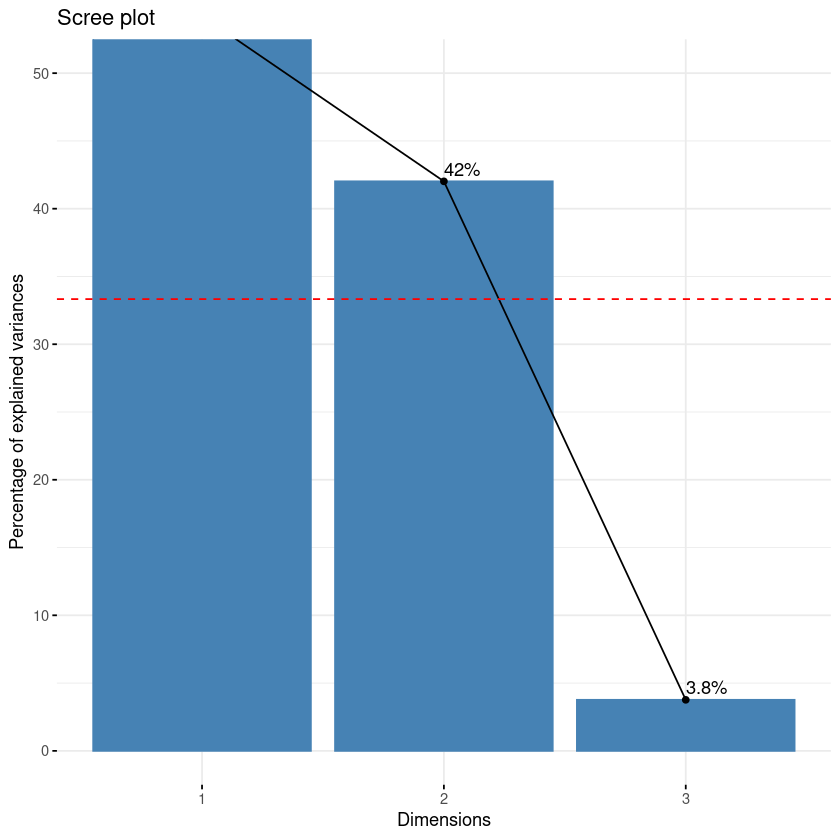

In [606]:
fviz_eig(res.afc, addlabels = TRUE, ylim = c(0, 50))  +
geom_hline (yintercept = 33.33, linetype = 2, color = "red")

Représentation des points sur le plan des dimensions :

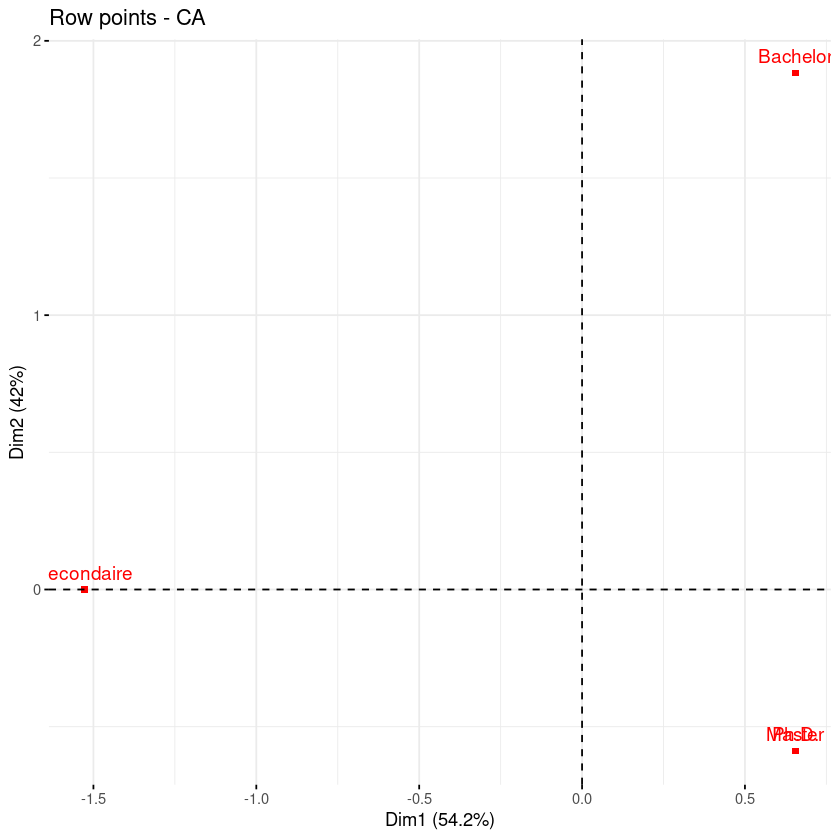

In [607]:
fviz_ca_row (res.afc, col.row = "red", shape.row = 15)

Interprétation :

On observe que la modalité "secondaire" caractérise le dimension 1.
La dimension 2 est caractérisé par les modalités "Ph.D." et "Bachelor".
La modalité  "Master" est achevale, c'est a dire qui est au milieu entre les deux dimensions, mais il est plus proche du dimension 1.

Signification des dimensions :
On peut dire que le dimension 1 oppose la modalité "Secondaire" et "Master".
On peut dire que le dimension 2 oppose la modalité "Ph.D" et "Bachelor".

On voit la qualité de représentation des modalités :

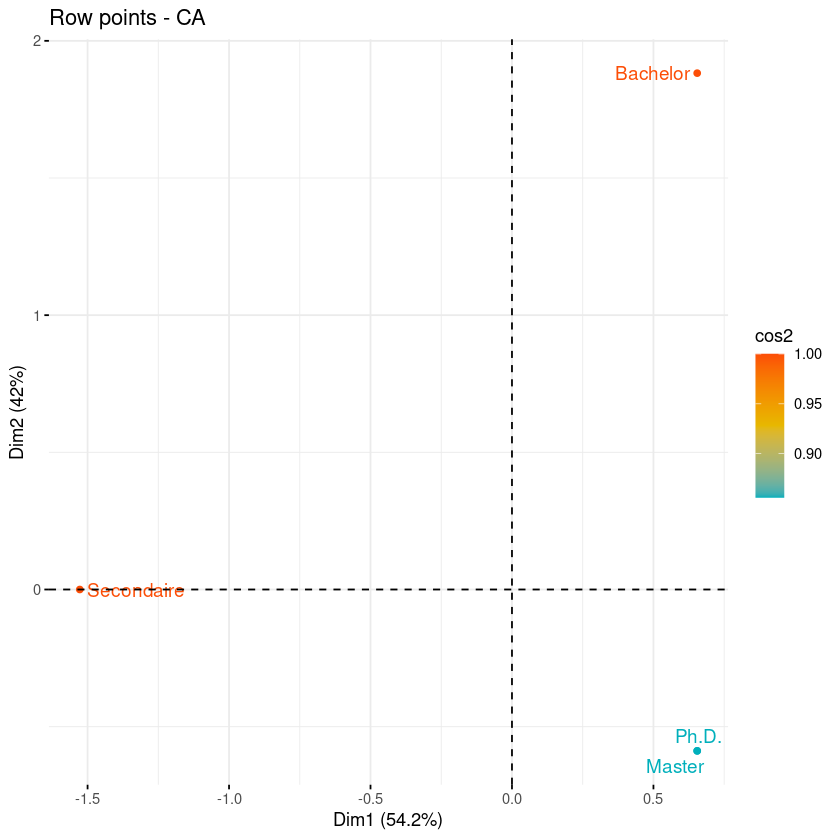

In [608]:
fviz_ca_row (res.afc, col.row = "cos2",
gradient.cols = c ("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE)


On voit ici les modalités qui sont bien représenté (Secondaires, Bachelor), et les modalités qui sont mal représenté(Master, Ph.D.).

On voit la contribution des modalités dans les dimensions:

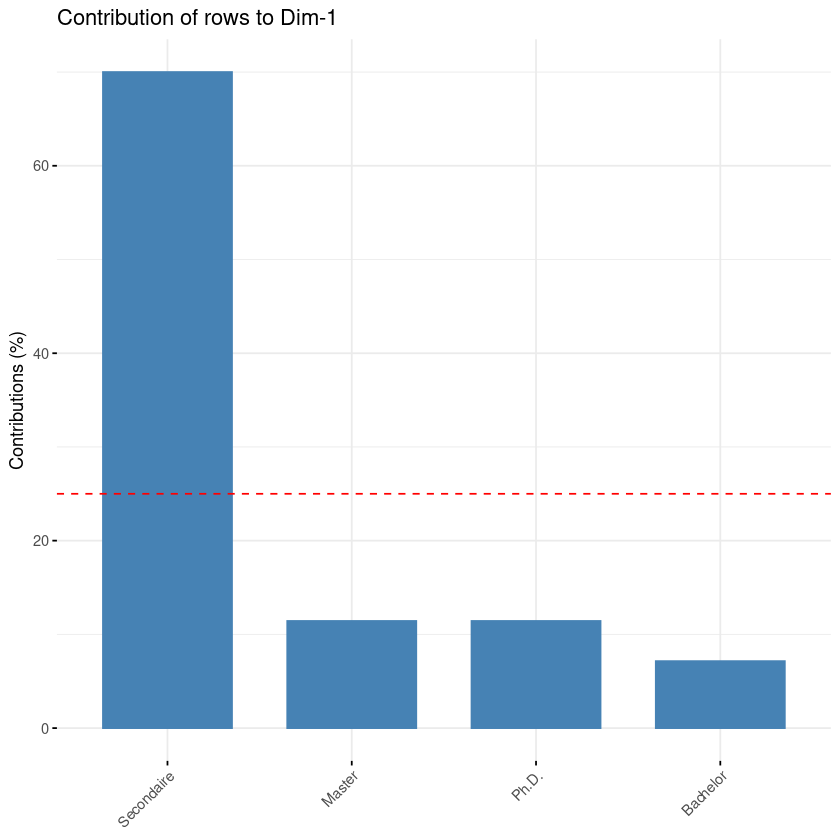

In [609]:
# Contributions des lignes ? la dimension 1
fviz_contrib(res.afc,addlabels = TRUE, choice = "row", axes = 1)

Ici la modalité "Secondaire" contribue le plus dans le dimension 1.

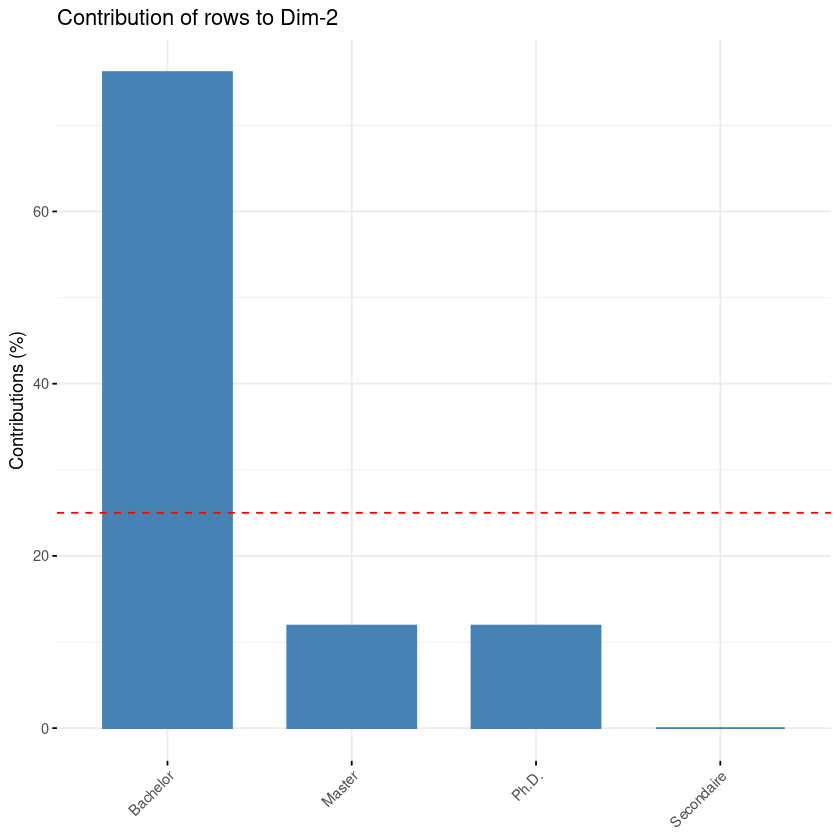

In [610]:
# Contributions des lignes ? la dimension 2
fviz_contrib(res.afc, choice = "row", axes = 2)

La modalité "Bachelor" contribue le plus dans le dimension 2, suivit par la modalité "Ph.D.".

##### Sur le profile colonne

In [611]:
library(factoextra)
col <- get_ca_col(res.afc)

Représentation graphique des modalité sur le plan des dimensions :

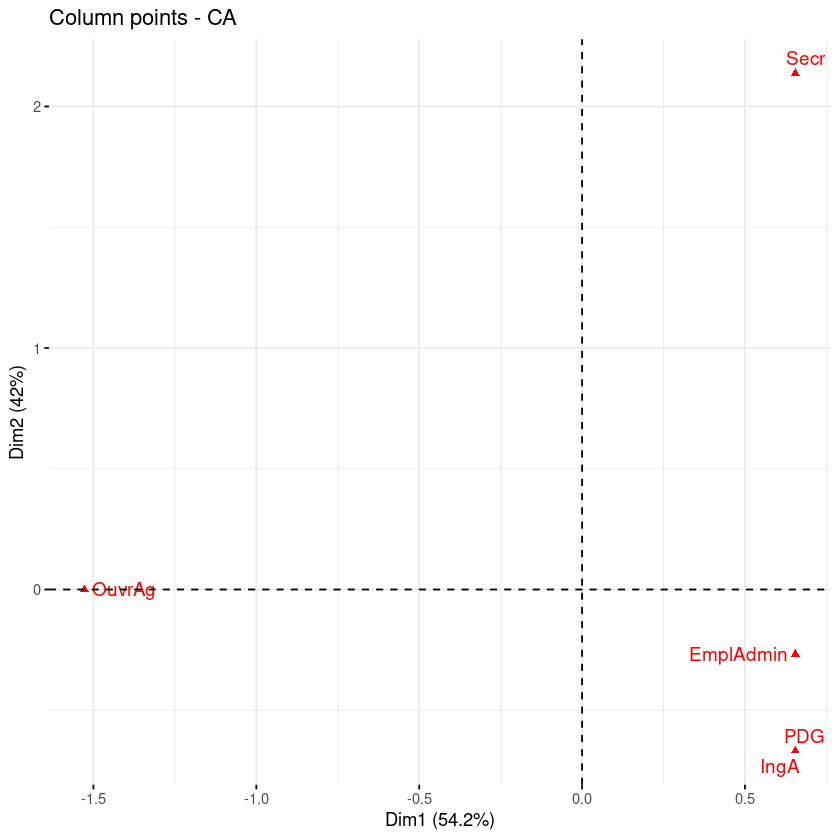

In [612]:
fviz_ca_col (res.afc,
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE)


Interprétation :

On voit que les modalités "OuvrAg" et "IngA caractérise le dimension 1 .
La dimension 2 est caractérisé par les modalités "PDG", "EmplAdmin" et "Secr".

Signification des dimensions :
Le dimension 1 oppose les modalités "OuvrAg" et "IngA" et le dimension 2 oppose les modalités "PDG", "EmplAdmin" et "Secr".

On voit la qualité de représentation des modalités :

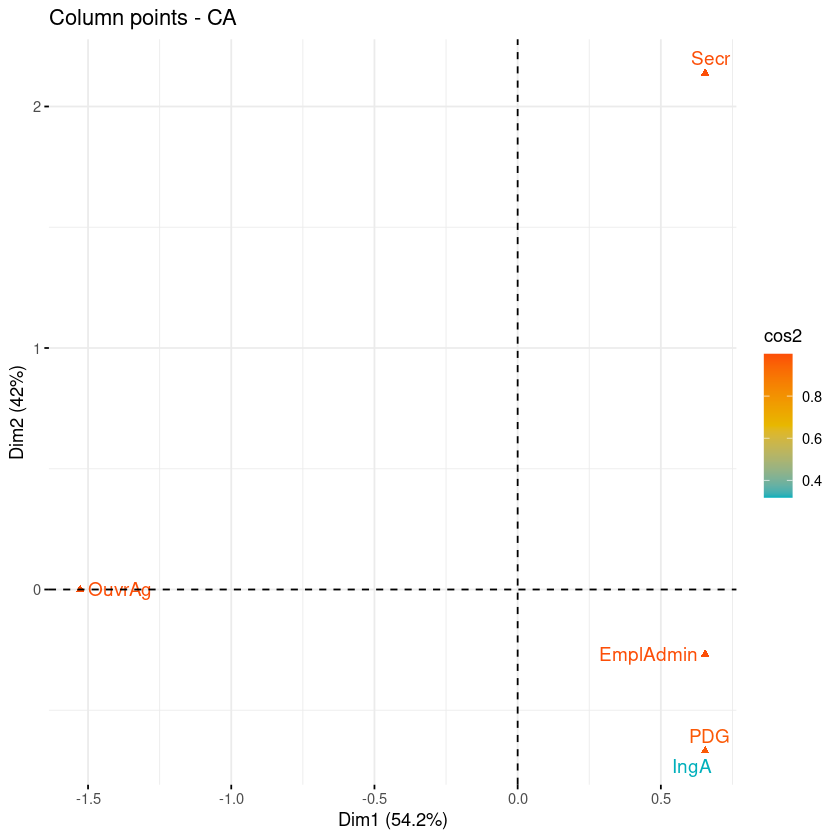

In [613]:
fviz_ca_col (res.afc, col.col = "cos2",
gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
repel = TRUE)


On voir que les modalités "OuvrAg" et "Secr" sont bien représenté, et la modalité "IngA" est mal représenté.

On voir la contribution des modalités dans les dimensions :

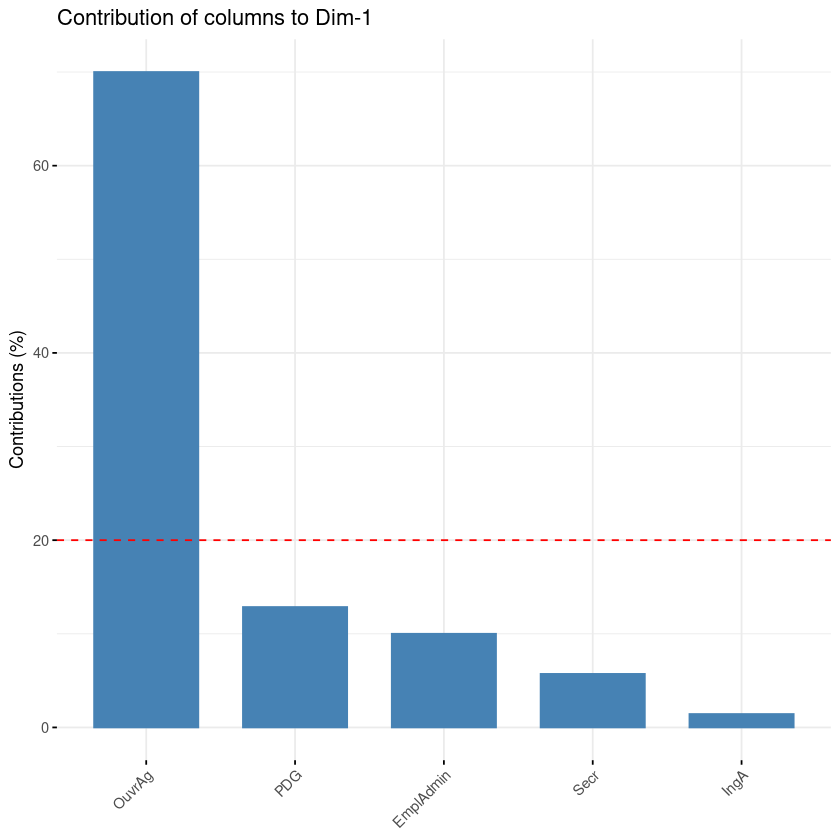

In [614]:
fviz_contrib(res.afc, choice = "col", axes = 1)


La modalité "OuvrAg" contribue le plus dans le dimension 1.

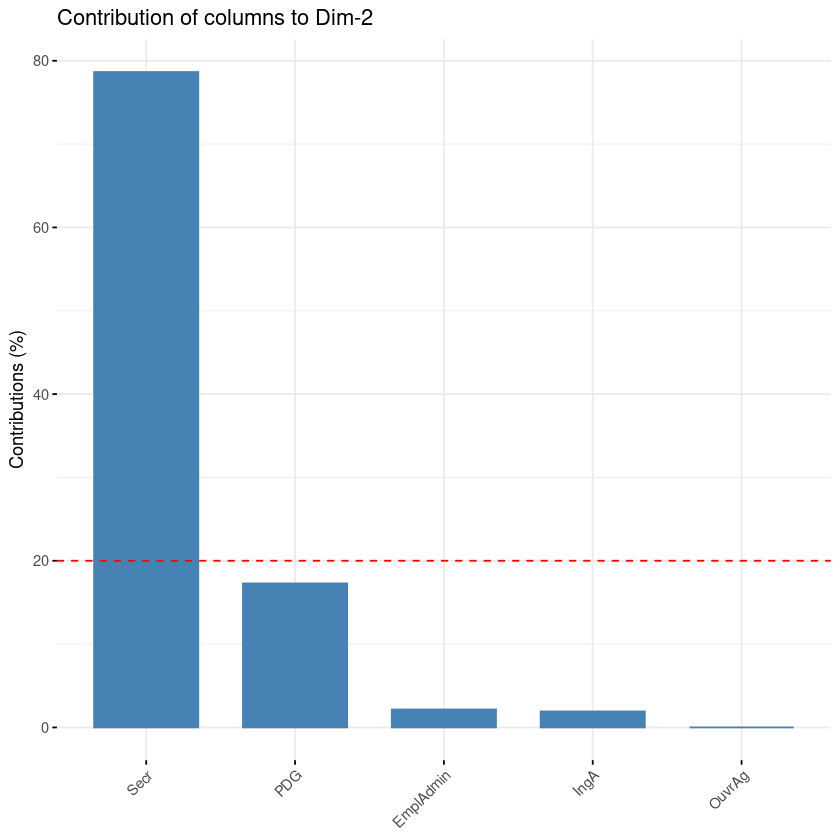

In [615]:
fviz_contrib(res.afc, choice = "col", axes = 2)

Les modalités "Secr" et "PDG" contribuent les plus dans le dimension 2.

##### Conclusion

Dans la conclusion, on donne une interprétation des dimensions, ainsi que les regroupement des individus.

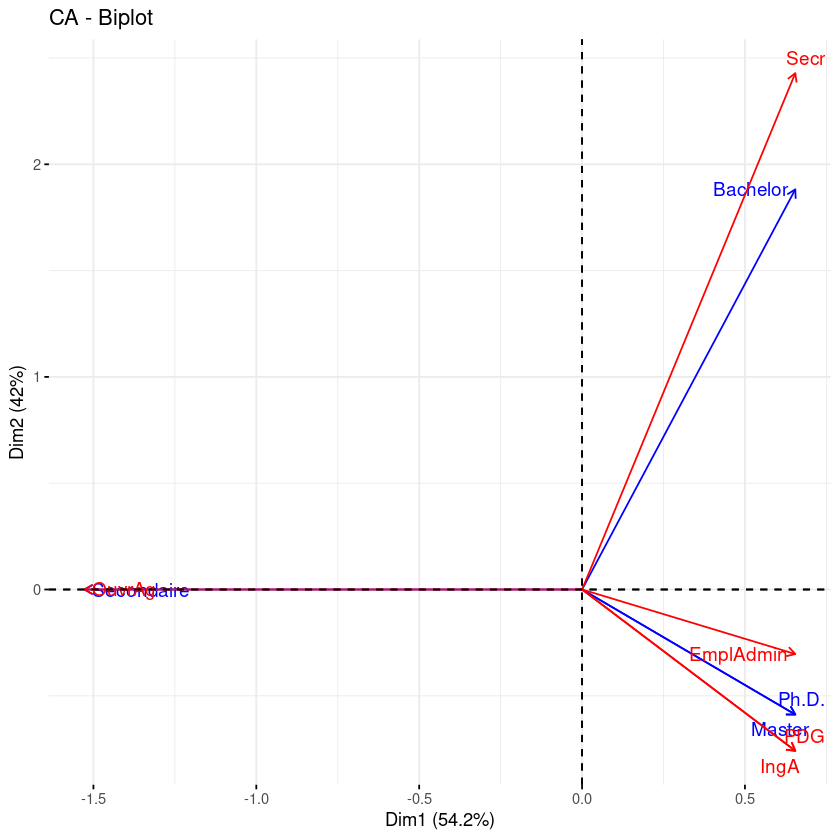

In [616]:
# Asym?trique
fviz_ca_biplot (res.afc,
map = "rowprincipal", arrow = c(TRUE, TRUE),
repel = TRUE)

Signification des dimensions :

l'axe 1 oppose les individus selon leur niveau d’études, et l'axe 2 oppose les individus selon leur poste de travail.

Regroupement :

On peut grouper les individus en 4 groupes.

Groupe 1 : Les individus qui ont un niveau d’étude "Secondaire" et qui sont des "OuvrAg".  
Groupe 2 : Les individus qui ont un niveau d’étude "Bachelor" et qui sont des "Secr".  
Groupe 3 : Les individus qui ont un niveau d’étude "Ph.D." et qui sont des "PDG" ou bien des "EmplAdmin".  
Groupe 4 : Les individus qui ont un niveau d’étude "Master" et qui sont des "EmplAdmin" ou bien des "IngA".  

### Étude de deux variables mixtes :

La question que se pose dans cette analyse est, est ce qu'il y a une différence entre les moyennes de satisfaction entre les différents niveaux d’études, pour cela on va effectuer une ANOVA. D'une autre manier, on va voir si le niveau d’étude a un effet sur la satisfaction.

#### ANOVA

**Hypothèses du Test ANOVA (Analyse de Variance) :**


\begin{cases}
H_0 : \text{Toutes les moyennes des groupes sont égales} \\
H_1 : \text{Au moins une moyenne de groupe est différente}
\end{cases}


**Interprétation :**

- Si la valeur de p (p-value) est inférieure à un niveau de signification $\alpha$ choisi (par exemple, $\alpha = 0.05$), alors on rejette l'hypothèse nulle.
- Si p-value < $\alpha$, on conclut qu'il y a suffisamment de preuves pour affirmer qu'au moins une moyenne de groupe est différente.
- Si p-value ≥ $\alpha$, on ne rejette pas l'hypothèse nulle, ce qui signifie qu'il n'y a pas suffisamment de preuves pour affirmer que les moyennes des groupes sont différentes.

L'ANOVA est utilisée pour comparer les moyennes de trois groupes ou plus afin de déterminer s'il existe des différences significatives entre les groupes.

On construit le tableau de l'anova:

In [617]:
data_anv <- data.frame(score = data$Satisfaction, nv_etd = factor(data$Education))
levels(data$Education)

[1] "Bachelor"   "Master"     "Ph.D."      "Secondaire"

On importe les librairies nécessaires :

In [618]:
library("dplyr")
library("rstatix")
library("ggpubr")
attach(data_anv)

The following objects are masked from data_anv (pos = 3):

    nv_etd, score


The following objects are masked from data_anv (pos = 6):

    nv_etd, score


The following objects are masked from data_anv (pos = 7):

    nv_etd, score


The following objects are masked from data_anv (pos = 8):

    nv_etd, score


The following objects are masked from data_anv (pos = 9):

    nv_etd, score


The following objects are masked from data_anv (pos = 10):

    nv_etd, score


The following objects are masked from data_anv (pos = 11):

    nv_etd, score


The following objects are masked from data_anv (pos = 12):

    nv_etd, score





##### Test de Tukey

**Conditions nécessaires pour le Test de Tukey après ANOVA :**

1. **Homogénéité des Variances :**
   - Les variances des groupes comparés doivent être approximativement égales. Cette condition est nécessaire pour que le test de Tukey soit valide.

2. **Normalité des modalités :**
   - Les modalités dans chaque groupe doivent suivre une distribution normale. Cette condition est nécessaire pour que le test de Tukey soit valide.

3. **Échantillons Indépendants :**
   - Les échantillons dans chaque groupe sont considérés comme indépendants les uns des autres. Cela signifie que l'appartenance à un groupe ne doit pas influencer l'appartenance à un autre groupe.

4. **Nombre de modalités Suffisante :**
   - La variable qualitative doit avoir au moins trois modalités. Si la variable n'a que deux modalités, le test de Tukey n'est pas applicable.

5. **Homogénéité des Groupes :**
   - Les groupes comparés doivent être homogènes en termes de caractéristiques pertinentes. Cela garantit que les groupes sont comparables et que toute différence observée est probablement due à la variable indépendante.


**Hypothèses du Test de Tukey :**
1. L'homogénéité des variances 

In [619]:
data_anv %>% group_by(data_anv$nv_etd) %>% get_summary_stats(score, type = "mean_sd")

data_anv$nv_etd,variable,n,mean,sd
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Bachelor,score,5,8.000,0.071
Master,score,8,8.338,0.393
Ph.D.,score,8,8.662,0.250
Secondaire,score,9,5.922,0.244


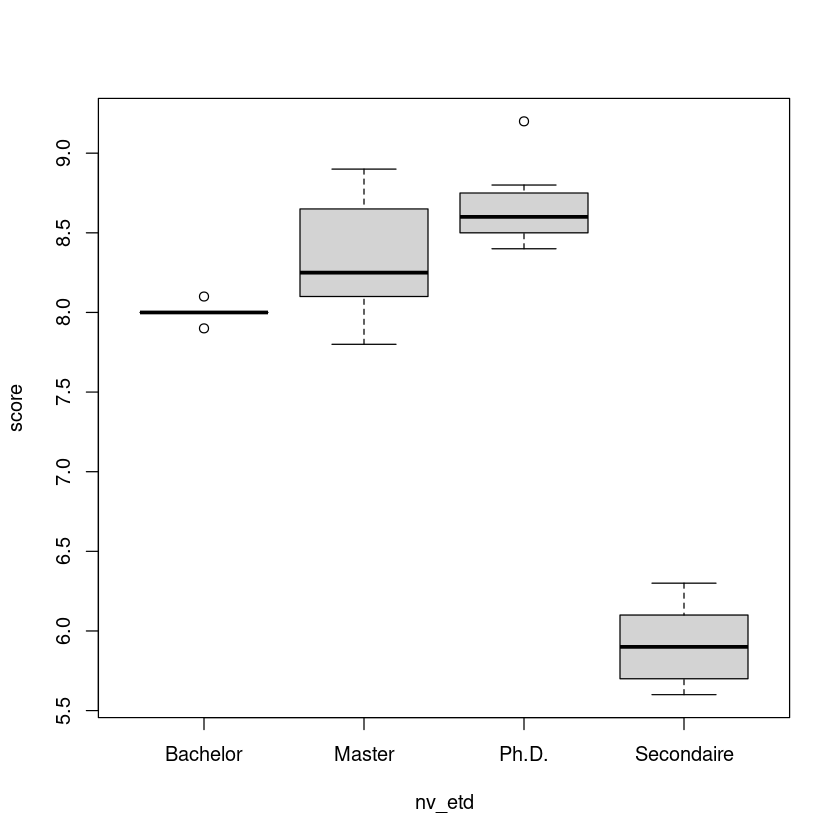

In [620]:
plot(score ~ nv_etd)

Les Bachelors et les Master ont presque la même moyenne , on remarque aussi une dispersion asymétrie sauf que les PHD qui ont une dispersion symétrique avec la présence des outliers.

2. Normalité des modalités : 

In [621]:
data_anv %>% group_by(nv_etd) %>% shapiro_test(score)

nv_etd,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
Bachelor,score,0.8834907,0.3254295
Master,score,0.9102223,0.3556318
Ph.D.,score,0.8591423,0.1177328
Secondaire,score,0.9509874,0.7009082


p-value de PHD et Master > $\alpha$ donc on accepte H0 donc il suivent la loi normal, pour les autres modalites on a p-value < $\alpha$ donc on rejette H0 donc ils ne suivent pas la loi normal.

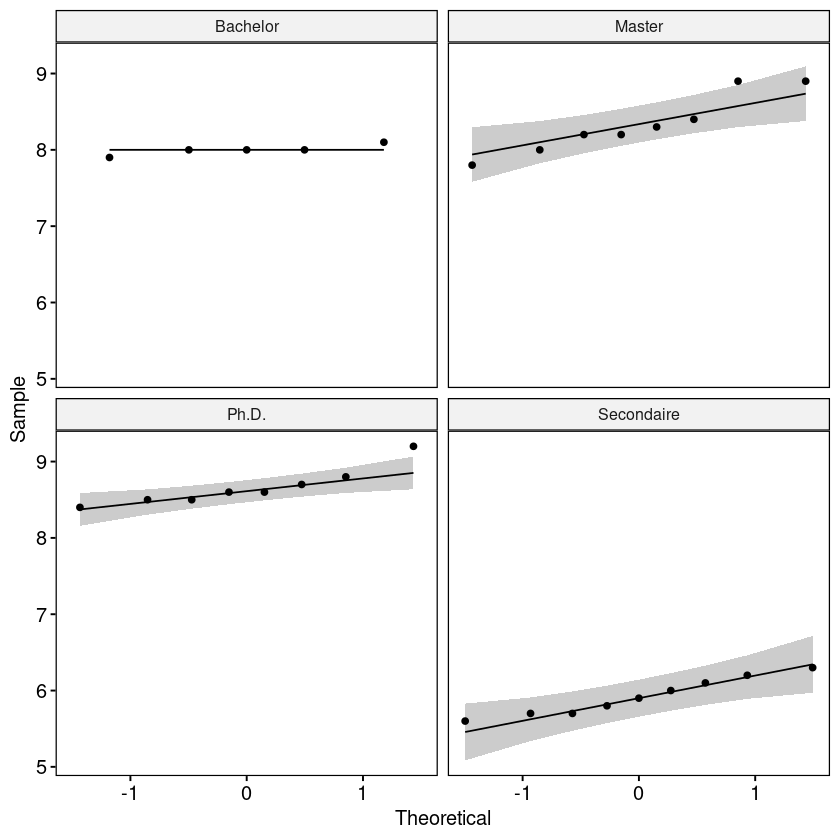

In [622]:
ggqqplot(data_anv, "score", facet.by = "nv_etd")

3. Indépendance des modalités :

In [623]:
dwtest(score ~ nv_etd)


	Durbin-Watson test

data:  score ~ nv_etd
DW = 2.2954, p-value = 0.7818
alternative hypothesis: true autocorrelation is greater than 0


Une p-value > $\alpha$ indique qu'on accepte l’hypothèse nulle, et que les modalités suivent sont indépendance.

4. Nombre de modalités Suffisante :

On a 4 modalités, donc cette condition est vérifié.

5. Homogénéité des Groupes :

In [624]:
library(car)
leveneTest(score ~ nv_etd)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,3,1.945307,0.1470715
,26,NA,NA


Une p-value > $\alpha$ indique qu'on accepte l’hypothèse nulle, et que les groupes sont homogènes.

#### Conclusion

On voit que la majorité des conditions ne sont pas vérifié, donc on ne peut pas appliquer le test de Tukey.

### Analyse multivariée


L'analyse multivariée constitue une étape avancée dans l'exploration des données, allant au-delà des relations entre deux variables pour examiner simultanément les interactions complexes entre plusieurs variables. Cette approche permet de dévoiler des tendances, des schémas et des associations plus riches au sein d'un ensemble de données.

**Pour les variables quantitatives :**

- **Régression linéaire multiple :** Lorsque plusieurs variables quantitatives influencent la variable dépendante, la régression linéaire multiple peut être utilisée pour modéliser ces relations complexes.


**Pour les variables qualitatives :**

1. **Analyse de la Variance à Deux Facteurs (ANOVA 2) :** Lorsqu'il y a deux variables qualitatives influençant une variable quantitative, l'ANOVA 2 peut être employée pour évaluer si les moyennes de la variable quantitative diffèrent significativement entre les différentes combinaisons des niveaux des variables qualitatives.

2. **Analyse en Composantes Principales (ACP) :** L'ACP, bien qu'initialement conçue pour les variables quantitatives, peut être adaptée pour les variables qualitatives sous forme de Tableau de Burt. Elle permet de visualiser et d'analyser les relations entre les catégories des variables qualitatives, révélant des tendances et des structures au sein des données.


In [625]:
X <- data.frame(data$Experience,data$Revenu,data$Age,data$Satisfaction)

In [626]:
cor_mat <- cor(X)
cor_mat

,data.Experience,data.Revenu,data.Age,data.Satisfaction
data.Experience,1.0000000,0.5947629,0.6699956,0.7587606
data.Revenu,0.5947629,1.0000000,0.6199125,0.8165147
data.Age,0.6699956,0.6199125,1.0000000,0.5690272
data.Satisfaction,0.7587606,0.8165147,0.5690272,1.0000000


On remarque l'existance d'une correlation entre les regresseurs d'ou on ne peut pas faire la regression Multiple et on doit pratiquer ACP

### ACP

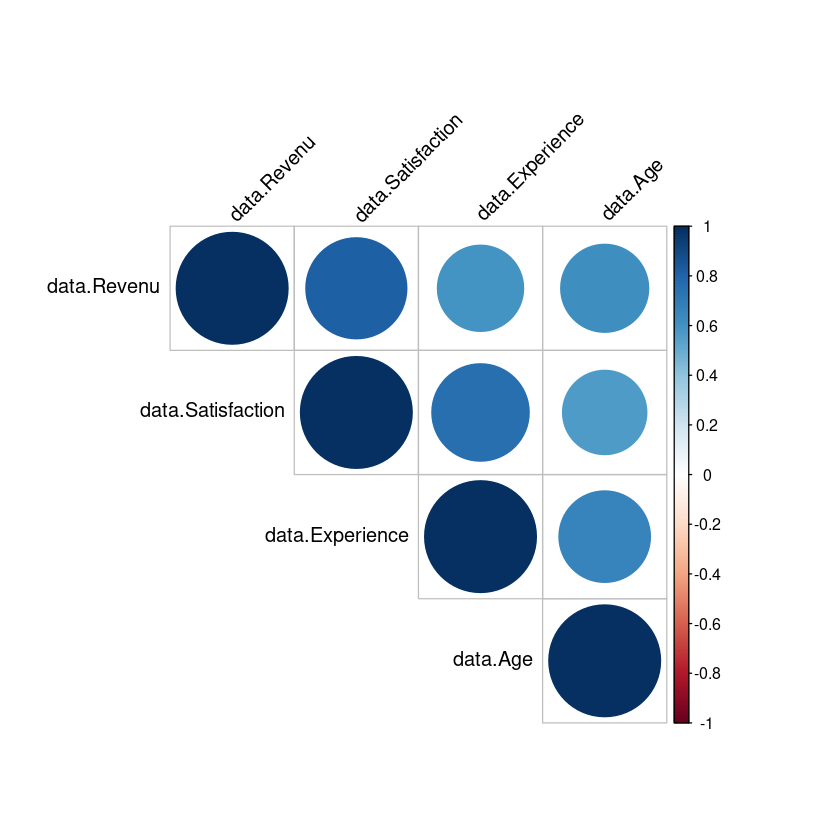

In [627]:
corrplot(cor_mat, type =  "upper", order = "hclust", tl.col = "black", tl.srt = 45)

In [628]:
bartlett.test(X)


	Bartlett test of homogeneity of variances

data:  X
Bartlett's K-squared = 1406.4, df = 3, p-value < 2.2e-16


Le Test de Bartelette nous confirme a nouveau la non homoginite des donnes

### Extraction des valeurs propres et variances des composantes principales

In [629]:
res.acp <- PCA(X, graph = FALSE)
get_eigenvalue(res.acp)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.0185280,75.463200,75.46320
Dim.2,0.4897733,12.244332,87.70753
Dim.3,0.3762244,9.405611,97.11314
Dim.4,0.1154743,2.886857,100.00000


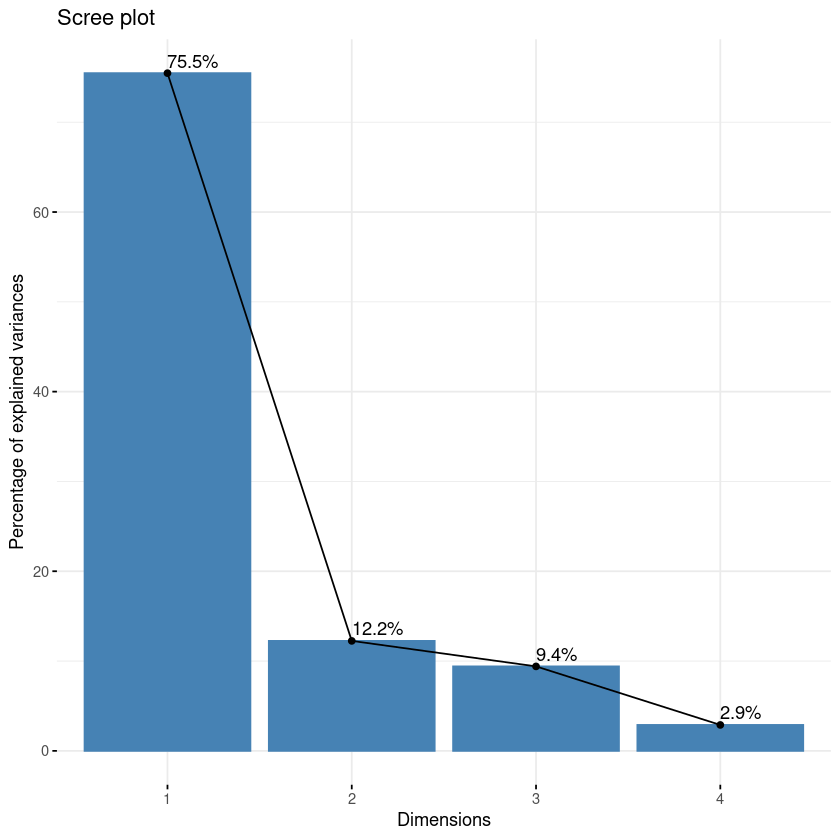

In [630]:
fviz_eig(res.acp, addlabels = TRUE)

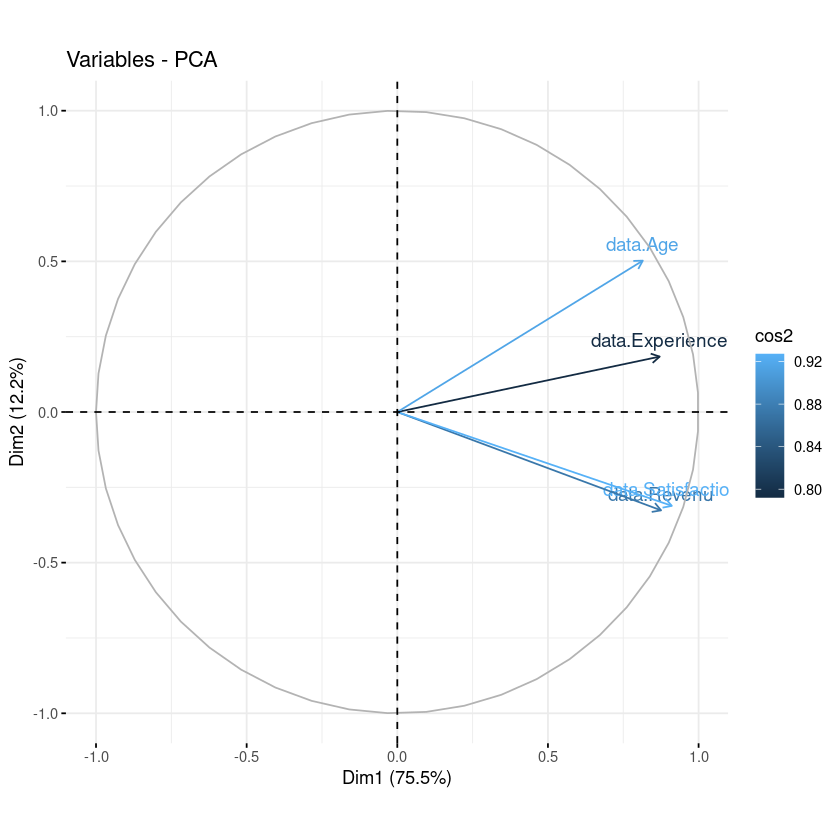

In [631]:
fviz_pca_var(res.acp, choice = "col", col.var = "cos2", axes = c(1, 2))

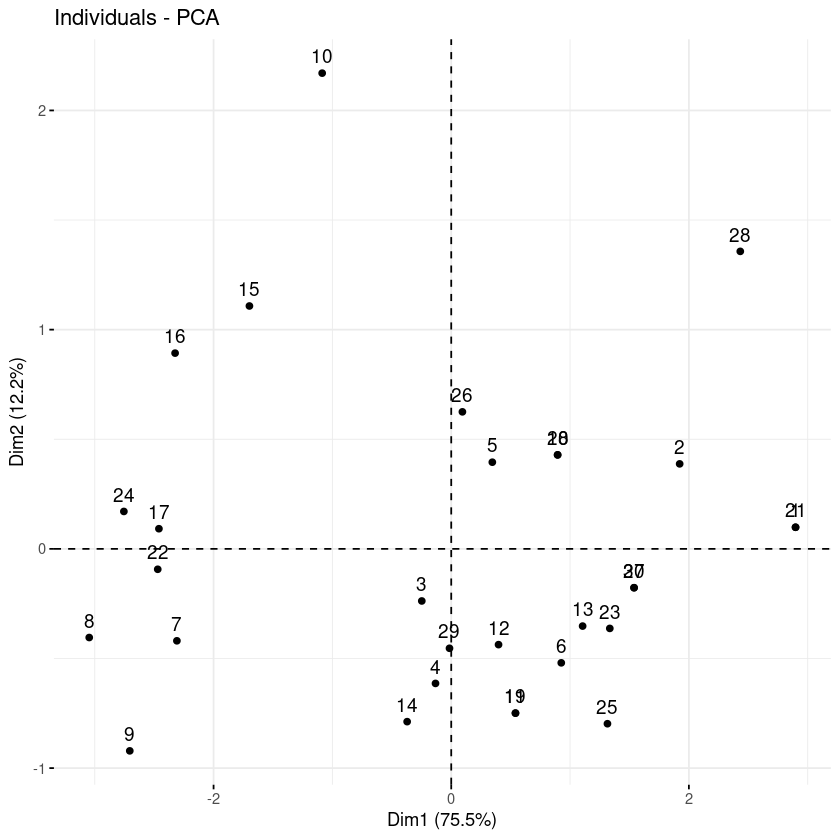

In [632]:
fviz_pca_ind(res.acp, choice = "col", col.var = "cos2", axes = c(1, 2))

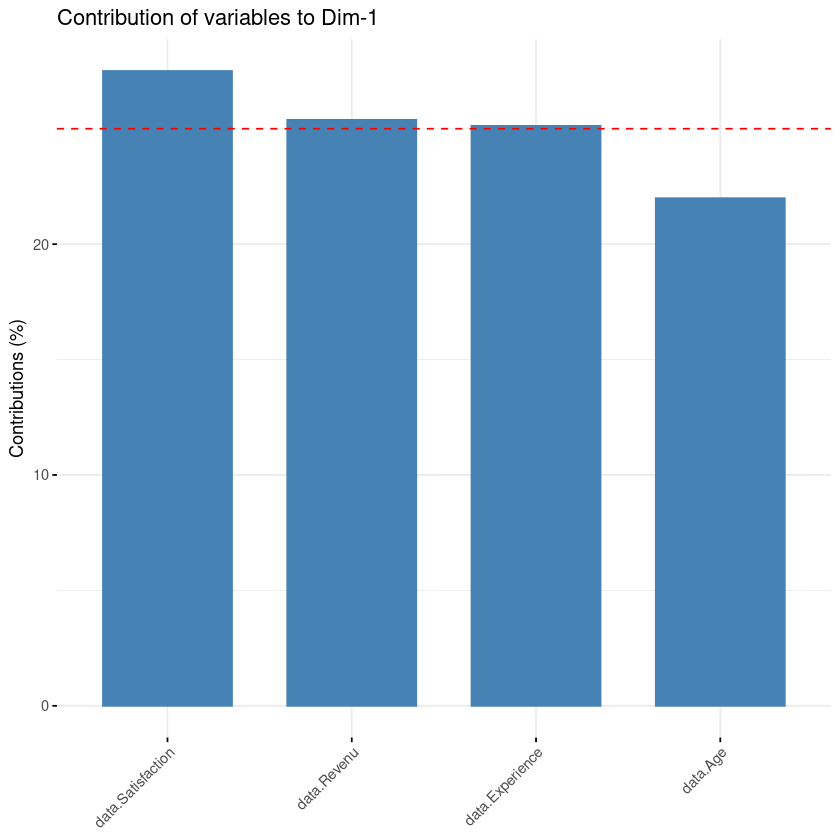

In [633]:
fviz_contrib(res.acp, choice = "var", axes = 1)

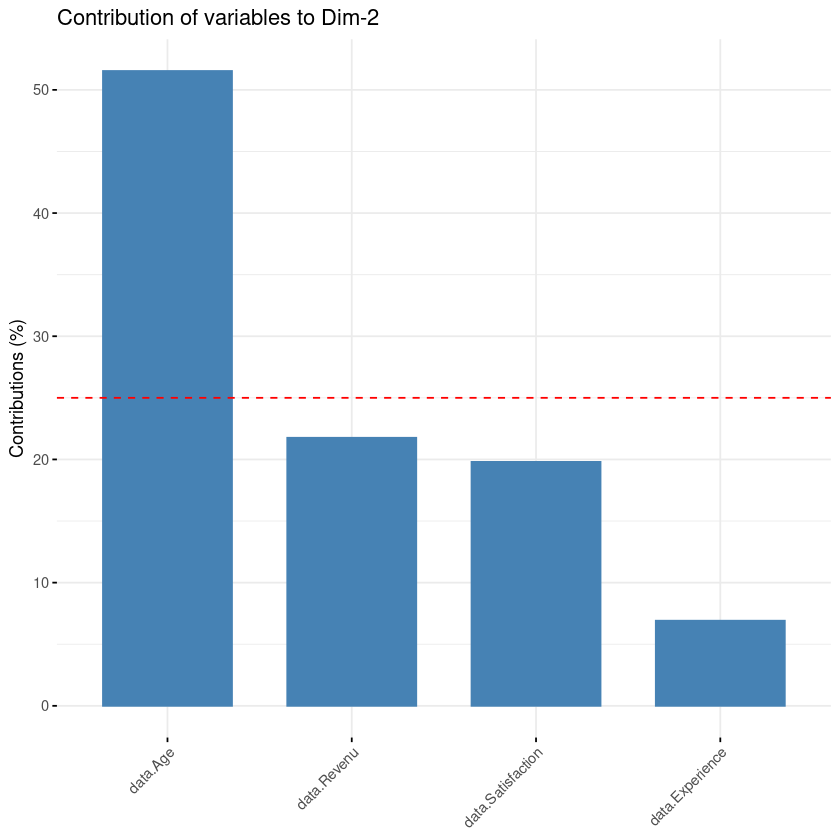

In [634]:
fviz_contrib(res.acp, choice = "var", axes = 2)

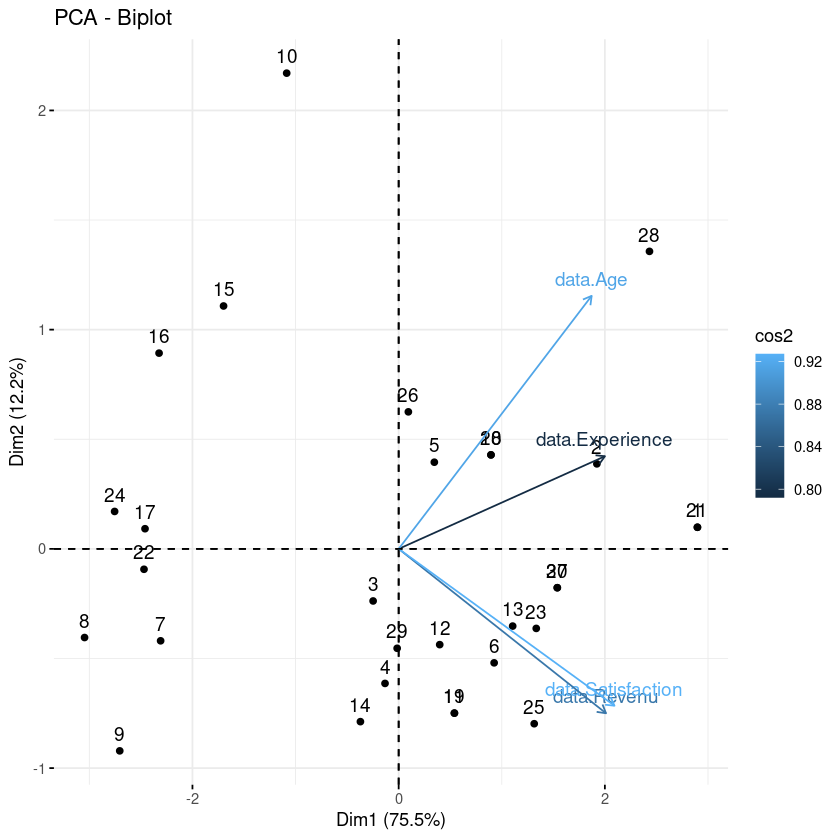

In [635]:
fviz_pca(res.acp, choice = "col", col.var = "cos2", axes = c(1, 2))